<a href="https://colab.research.google.com/github/RiyaBhurse/CategoricalAndDummyVariable/blob/main/CategorialAndDummyVariablesOneHotEncoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

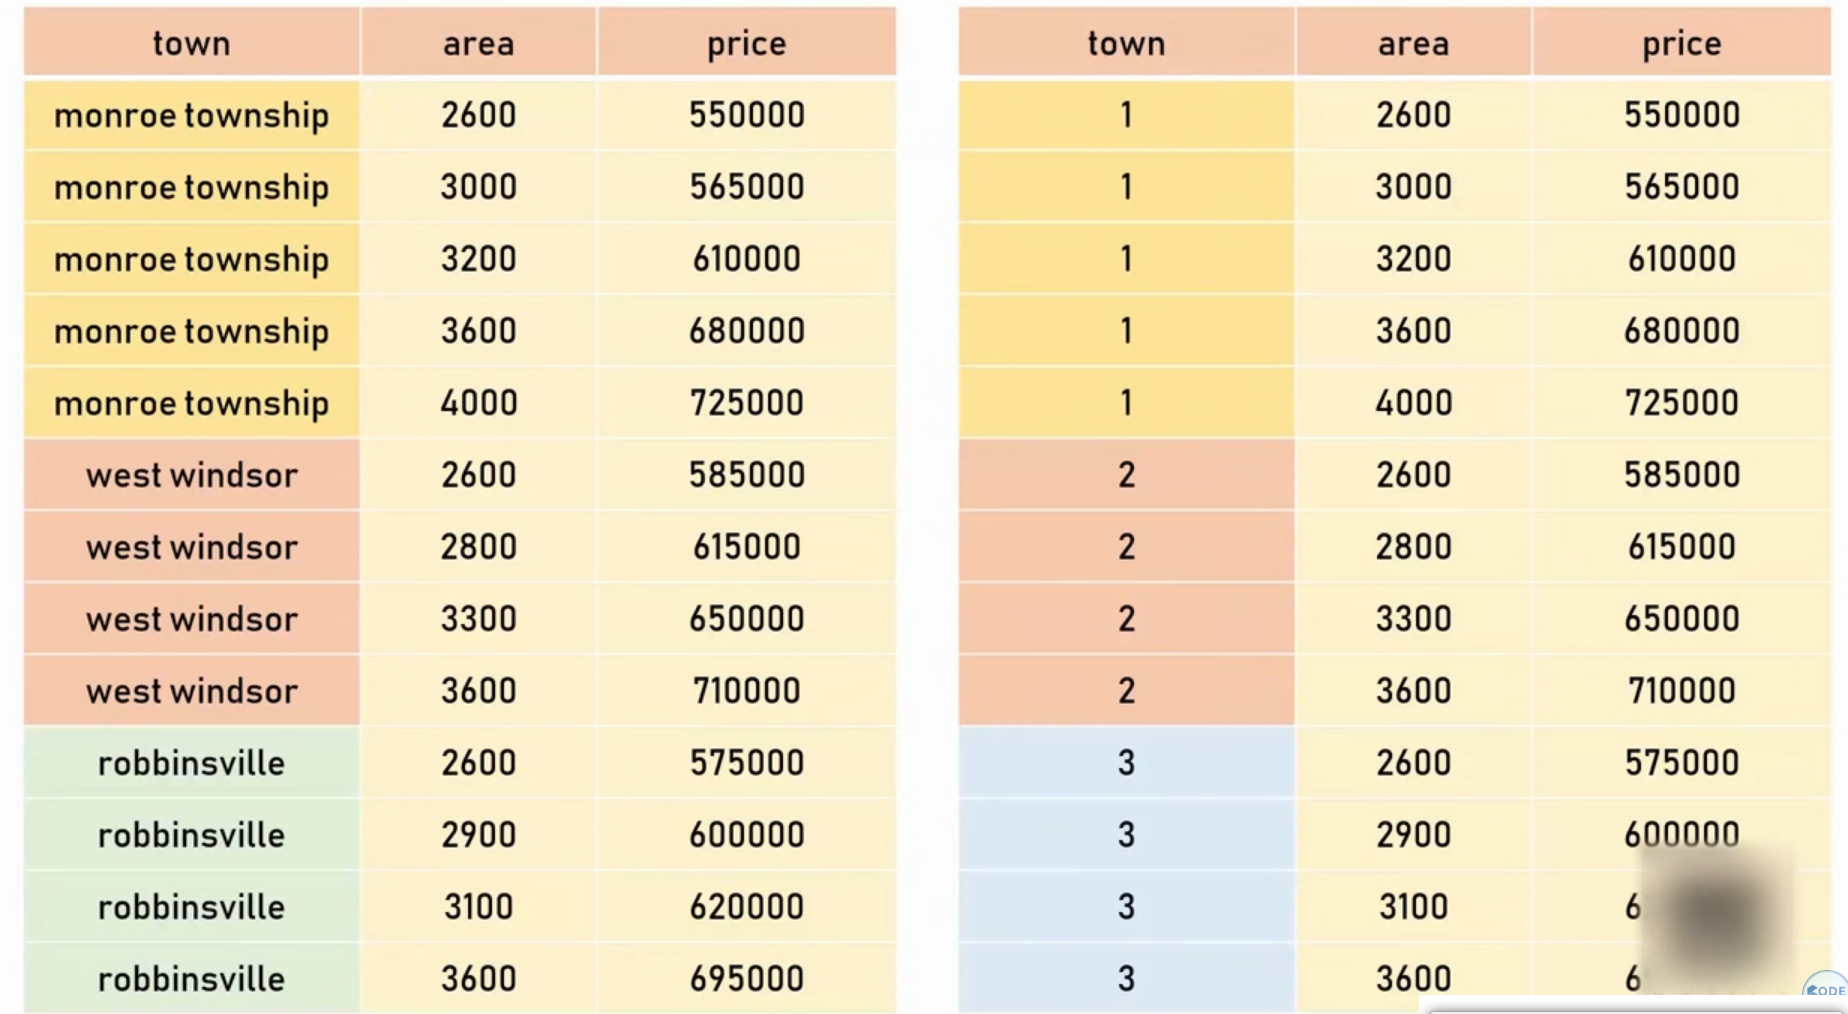

Our model can handle numaric data, so we can achieve it by numeric encoding or by lable encoding

Where you convert a town to a specific number, but problem is that our model will assume that the name is in some order like monroe township is of less value compared to the rest as it has the least number after encoding!

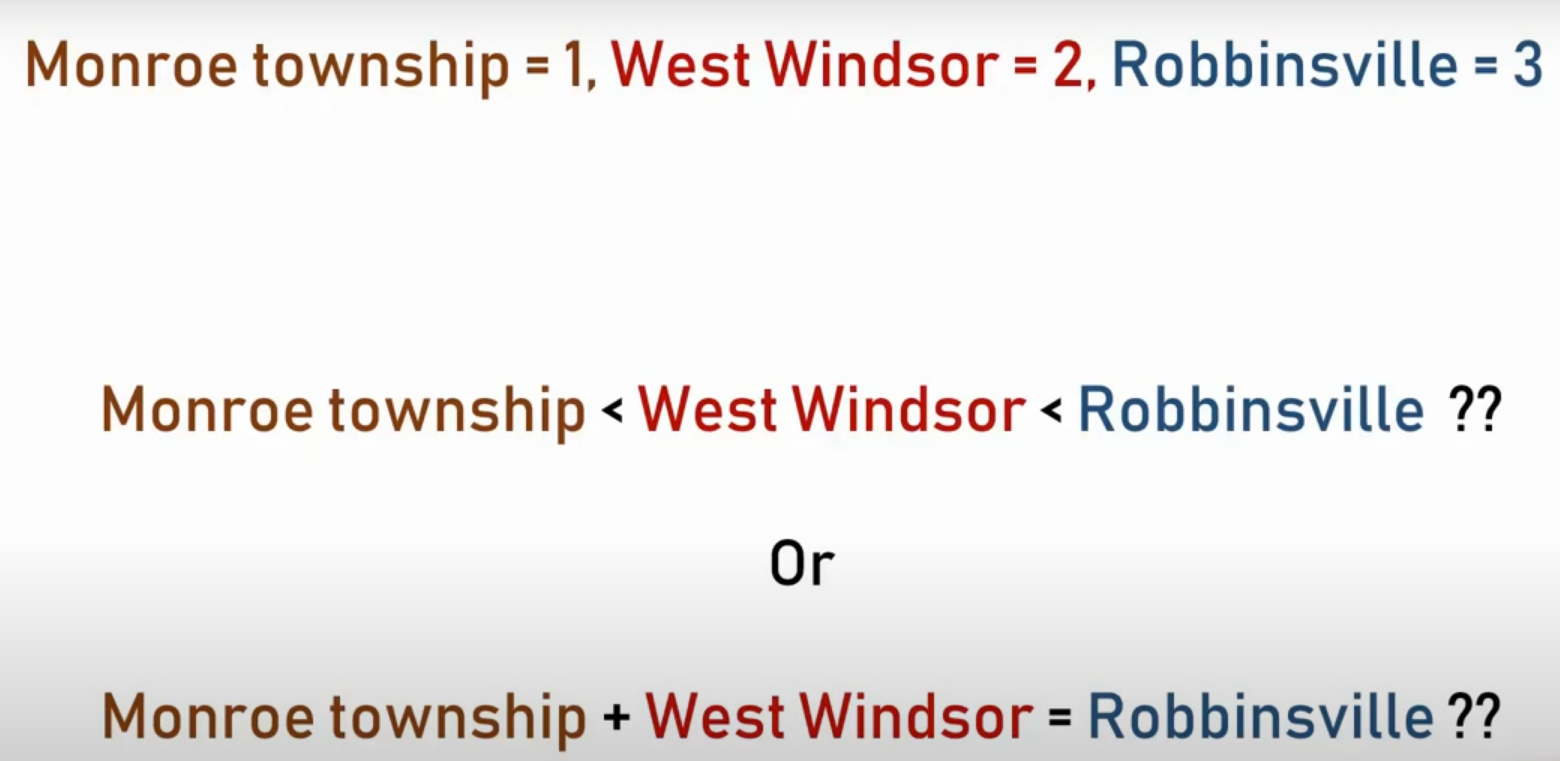

These variables are called ***categorical variable***, and the names we are dealing with like Monroe township are called ***Nominal Variable***

So categorical variables are dividen into two parts.

**1. Nominal variable** where the categories dont have any numeric ordering in between them.
Example: [Male,Female] [India,USA,Russia]

**2. Ordinal variable** where there is some sort of ordering. Example: [first,second,third] [start,end] [high,medium,low]



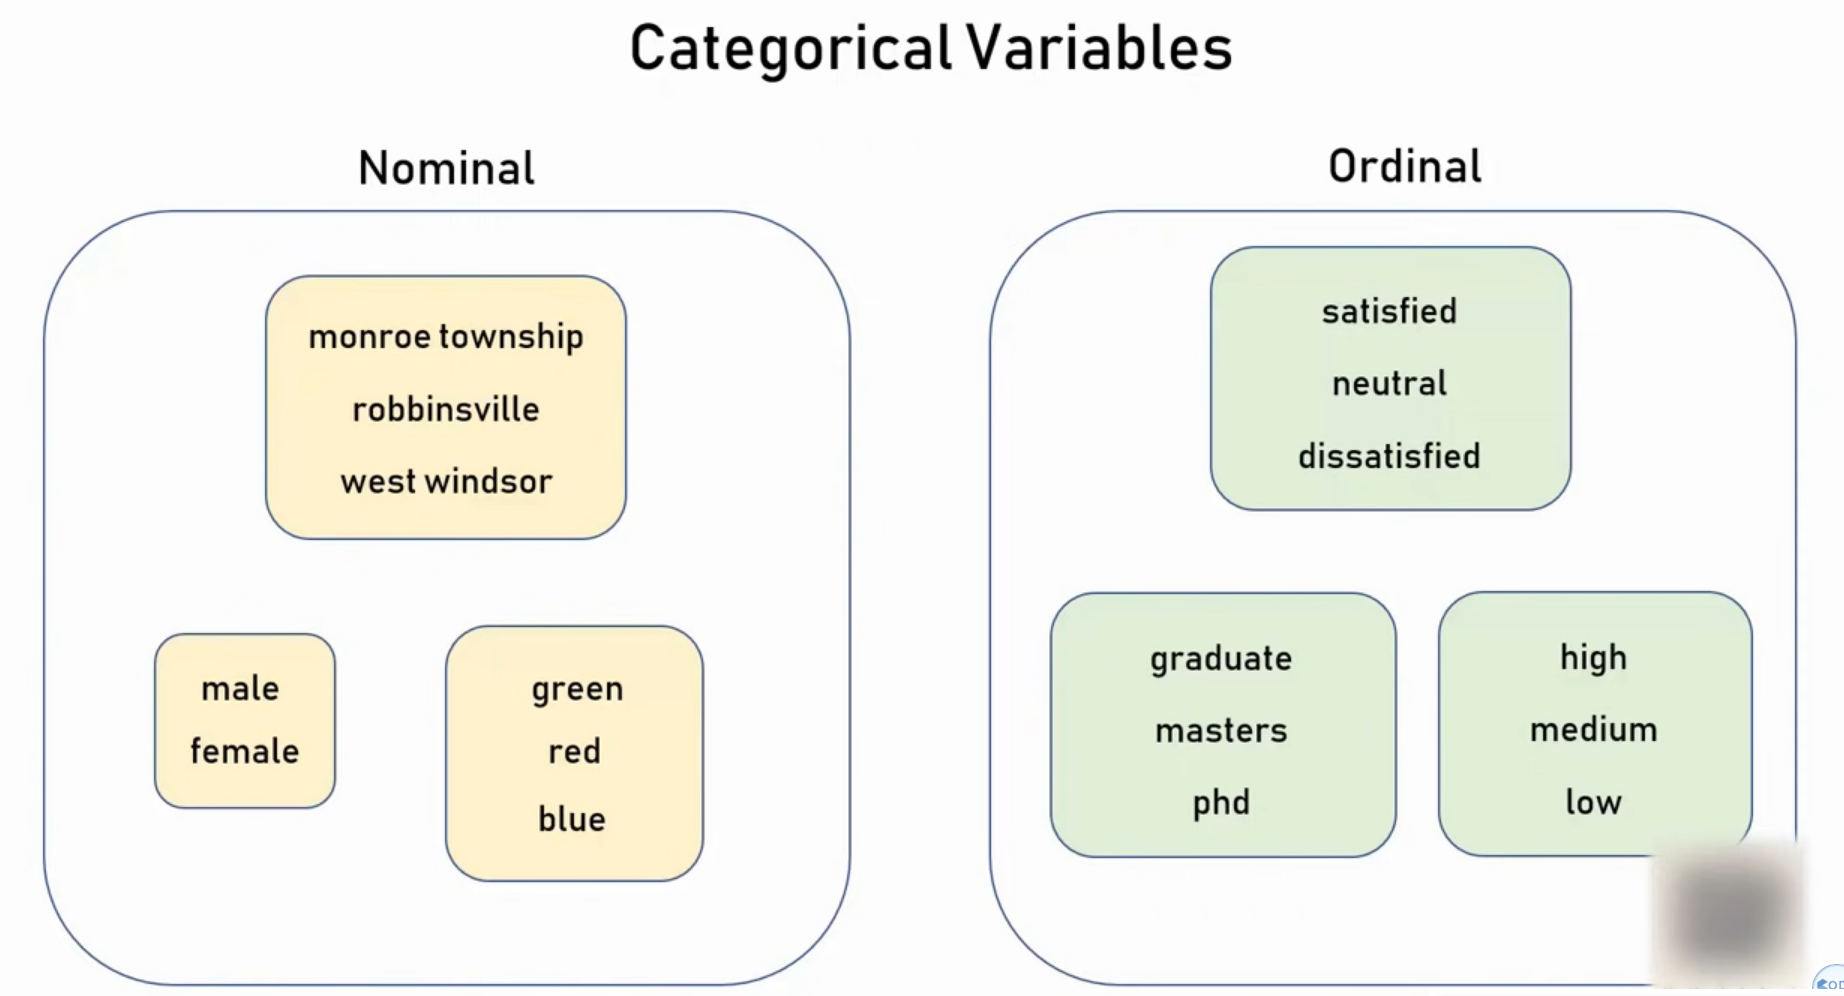

Now we are dealing with Nominal Catogorical Variables and simple integer encoding is **Not Going To Work!!!**

So we will start using a technique called **ONE HOT ENCODING**

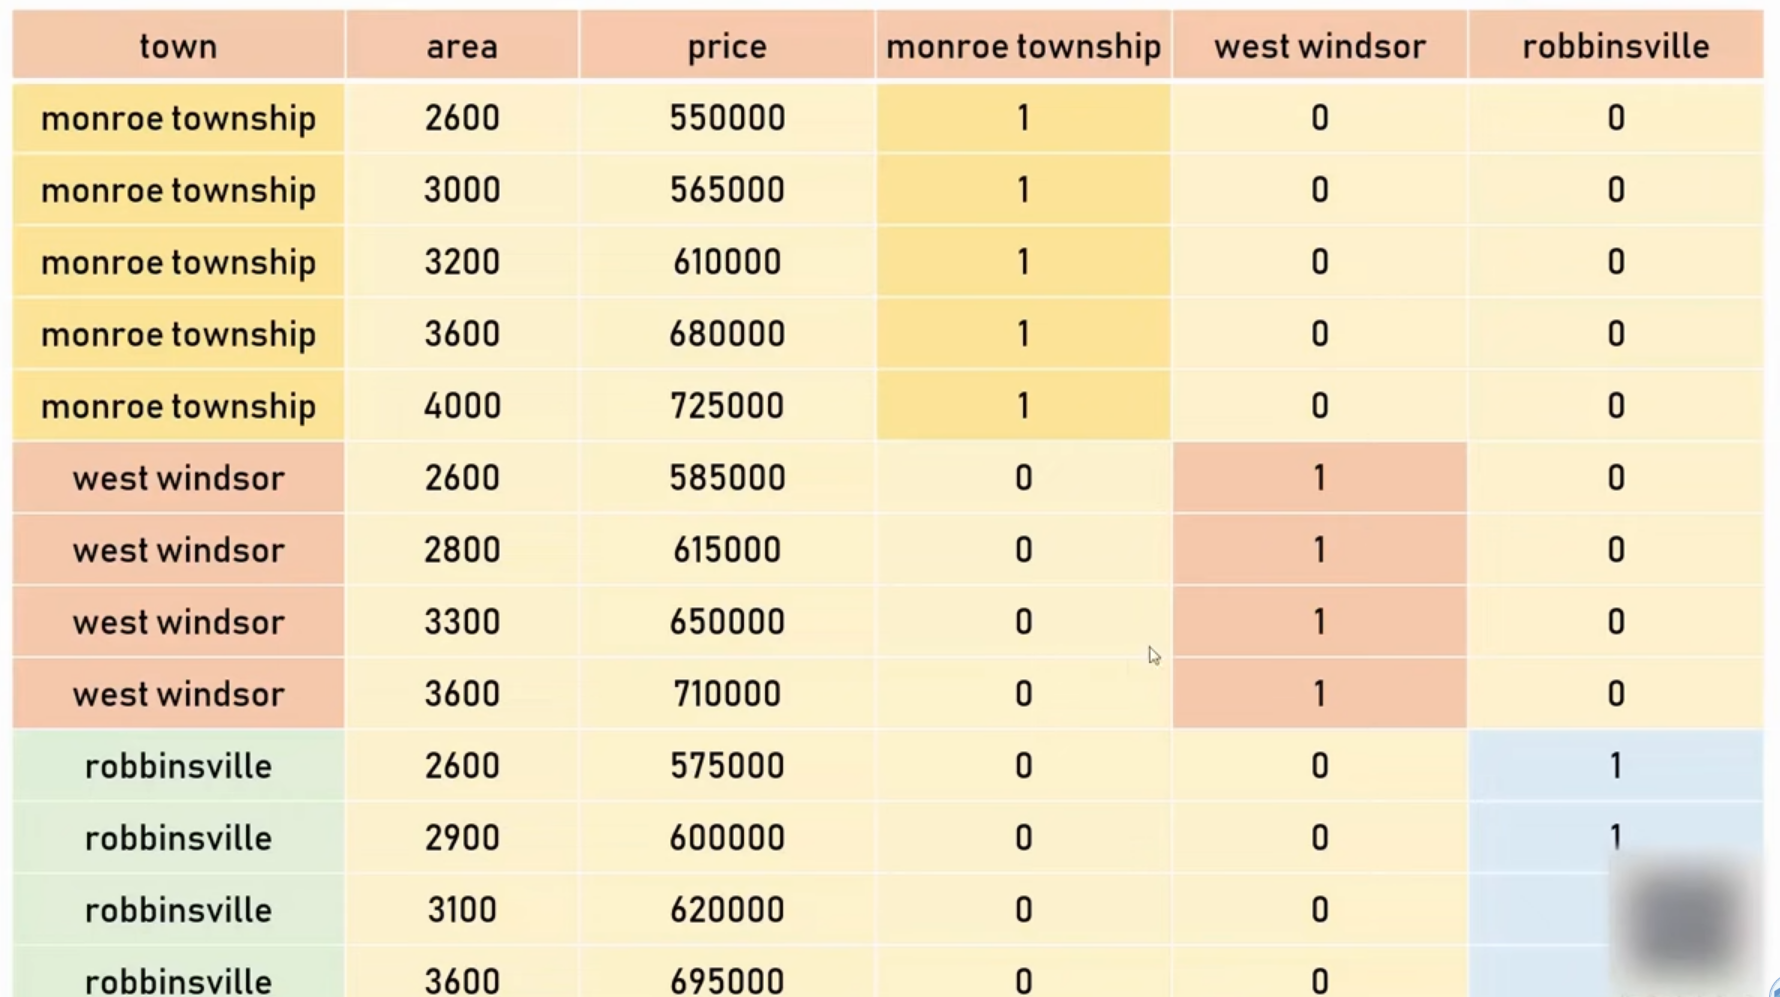

We create a new column for each of our catogrey and put binary numbers, and these new variables columns are called dummy variables.

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [53]:
df = pd.read_csv('housing_data.csv')

In [54]:
df

town  area   price
0   monroe township  2600  550000
1   monroe township  3000  565000
2   monroe township  3200  610000
3   monroe township  3600  680000
4   monroe township  4000  725000
5      west windsor  2600  585000
6      west windsor  2800  615000
7      west windsor  3300  650000
8      west windsor  3600  710000
9      robbinsville  2600  575000
10     robbinsville  2900  600000
11     robbinsville  3100  620000
12     robbinsville  3600  695000

In [55]:
dummies = pd.get_dummies(df['town'])

In [56]:
dummies

monroe township  robbinsville  west windsor
0              True         False         False
1              True         False         False
2              True         False         False
3              True         False         False
4              True         False         False
5             False         False          True
6             False         False          True
7             False         False          True
8             False         False          True
9             False          True         False
10            False          True         False
11            False          True         False
12            False          True         False

In [57]:
merged = pd.concat([df,dummies], axis='columns')
merged


town  area   price  monroe township  robbinsville  west windsor
0   monroe township  2600  550000             True         False         False
1   monroe township  3000  565000             True         False         False
2   monroe township  3200  610000             True         False         False
3   monroe township  3600  680000             True         False         False
4   monroe township  4000  725000             True         False         False
5      west windsor  2600  585000            False         False          True
6      west windsor  2800  615000            False         False          True
7      west windsor  3300  650000            False         False          True
8      west windsor  3600  710000            False         False          True
9      robbinsville  2600  575000            False          True         False
10     robbinsville  2900  600000            False          True         False
11     robbinsville  3100  620000            False          True         False
12     robbinsville  3600  695000            False          True         False

The dummy variable trap is a common issue in regression analysis when dealing with categorical variables. It occurs when two or more dummy variables created by one-hot encoding are highly correlated (multicollinear). This multicollinearity makes it difficult to interpret the coefficients of the regression model accurately


In [58]:
merged

town  area   price  monroe township  robbinsville  west windsor
0   monroe township  2600  550000             True         False         False
1   monroe township  3000  565000             True         False         False
2   monroe township  3200  610000             True         False         False
3   monroe township  3600  680000             True         False         False
4   monroe township  4000  725000             True         False         False
5      west windsor  2600  585000            False         False          True
6      west windsor  2800  615000            False         False          True
7      west windsor  3300  650000            False         False          True
8      west windsor  3600  710000            False         False          True
9      robbinsville  2600  575000            False          True         False
10     robbinsville  2900  600000            False          True         False
11     robbinsville  3100  620000            False          True         False
12     robbinsville  3600  695000            False          True         False

We need to drop town column as it can be derived from other columns and also we will delete on of the dummy variable column, because it can be derived from other dummy variable columns!!! eg. if we have 4 dummy variable columns then we can delete anyone of them, as we can derive its value based on the remaining 3 columns, like in a row if any one of the 3 dummy variable is true then we can say the 4th column value is false else true.


# ***Read About Dummy Variable Trap!!!!!***

Also sklearn linearregression model will drop the columns automatically as it already knows about dummy variable trap


In [59]:
# why to drop not clear
final = merged.drop(['town','monroe township'], axis='columns')
final

area   price  robbinsville  west windsor
0   2600  550000         False         False
1   3000  565000         False         False
2   3200  610000         False         False
3   3600  680000         False         False
4   4000  725000         False         False
5   2600  585000         False          True
6   2800  615000         False          True
7   3300  650000         False          True
8   3600  710000         False          True
9   2600  575000          True         False
10  2900  600000          True         False
11  3100  620000          True         False
12  3600  695000          True         False

In [60]:
final

area   price  robbinsville  west windsor
0   2600  550000         False         False
1   3000  565000         False         False
2   3200  610000         False         False
3   3600  680000         False         False
4   4000  725000         False         False
5   2600  585000         False          True
6   2800  615000         False          True
7   3300  650000         False          True
8   3600  710000         False          True
9   2600  575000          True         False
10  2900  600000          True         False
11  3100  620000          True         False
12  3600  695000          True         False

In [61]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [62]:
X = final.drop('price', axis='columns')
X

area  robbinsville  west windsor
0   2600         False         False
1   3000         False         False
2   3200         False         False
3   3600         False         False
4   4000         False         False
5   2600         False          True
6   2800         False          True
7   3300         False          True
8   3600         False          True
9   2600          True         False
10  2900          True         False
11  3100          True         False
12  3600          True         False

In [63]:
Y = final.price
Y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [64]:
model.fit(X,Y)

LinearRegression()

In [65]:
model.predict([[2000,True,False]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([489257.68651903])

In [66]:
model.score(X,Y)
# compares predicted value with actual value

0.9573929037221871

In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [68]:
dfle = df
dfle.town = le.fit_transform(dfle.town)
dfle

town  area   price
0      0  2600  550000
1      0  3000  565000
2      0  3200  610000
3      0  3600  680000
4      0  4000  725000
5      2  2600  585000
6      2  2800  615000
7      2  3300  650000
8      2  3600  710000
9      1  2600  575000
10     1  2900  600000
11     1  3100  620000
12     1  3600  695000

In [69]:
X = df[['town','area']].values
X
# .values makes it array not df

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [70]:
Y = dfle.price
Y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [71]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer([("town", OneHotEncoder(), [0])], remainder = 'passthrough')
X = ct.fit_transform(X)
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [72]:
X = X[:,1:]

In [73]:
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [74]:
model.fit(X,Y)

LinearRegression()

In [75]:
model.predict([[1,0,2000]])

array([489257.68651903])

In [77]:
model.predict(([[0,1,2400]]))

array([554344.22704795])

In [78]:
# Exercise
cpdf = pd.read_csv('carprices.csv')
cpdf

Car Model  Mileage  Sell Price($)  Age(yrs)
0                  BMW X5    69000          18000         6
1                  BMW X5    35000          34000         3
2                  BMW X5    57000          26100         5
3                  BMW X5    22500          40000         2
4                  BMW X5    46000          31500         4
5                 Audi A5    59000          29400         5
6                 Audi A5    52000          32000         5
7                 Audi A5    72000          19300         6
8                 Audi A5    91000          12000         8
9   Mercedez Benz C class    67000          22000         6
10  Mercedez Benz C class    83000          20000         7
11  Mercedez Benz C class    79000          21000         7
12  Mercedez Benz C class    59000          33000         5

In [79]:
dummy = pd.get_dummies(cpdf['Car Model'])
dummy

Audi A5  BMW X5  Mercedez Benz C class
0     False    True                  False
1     False    True                  False
2     False    True                  False
3     False    True                  False
4     False    True                  False
5      True   False                  False
6      True   False                  False
7      True   False                  False
8      True   False                  False
9     False   False                   True
10    False   False                   True
11    False   False                   True
12    False   False                   True

In [84]:
merged = pd.concat([cpdf,dummy], axis='columns')
merged

Car Model  Mileage  Sell Price($)  Age(yrs)  Audi A5  BMW X5  \
0                  BMW X5    69000          18000         6    False    True   
1                  BMW X5    35000          34000         3    False    True   
2                  BMW X5    57000          26100         5    False    True   
3                  BMW X5    22500          40000         2    False    True   
4                  BMW X5    46000          31500         4    False    True   
5                 Audi A5    59000          29400         5     True   False   
6                 Audi A5    52000          32000         5     True   False   
7                 Audi A5    72000          19300         6     True   False   
8                 Audi A5    91000          12000         8     True   False   
9   Mercedez Benz C class    67000          22000         6    False   False   
10  Mercedez Benz C class    83000          20000         7    False   False   
11  Mercedez Benz C class    79000          21000         7    False   False   
12  Mercedez Benz C class    59000          33000         5    False   False   

    Mercedez Benz C class  
0                   False  
1                   False  
2                   False  
3                   False  
4                   False  
5                   False  
6                   False  
7                   False  
8                   False  
9                    True  
10                   True  
11                   True  
12                   True

In [85]:
final = merged.drop(['Car Model','Mercedez Benz C class'], axis='columns')
final

Mileage  Sell Price($)  Age(yrs)  Audi A5  BMW X5
0     69000          18000         6    False    True
1     35000          34000         3    False    True
2     57000          26100         5    False    True
3     22500          40000         2    False    True
4     46000          31500         4    False    True
5     59000          29400         5     True   False
6     52000          32000         5     True   False
7     72000          19300         6     True   False
8     91000          12000         8     True   False
9     67000          22000         6    False   False
10    83000          20000         7    False   False
11    79000          21000         7    False   False
12    59000          33000         5    False   False

In [86]:
X = final.drop('Sell Price($)', axis='columns')
X

Mileage  Age(yrs)  Audi A5  BMW X5
0     69000         6    False    True
1     35000         3    False    True
2     57000         5    False    True
3     22500         2    False    True
4     46000         4    False    True
5     59000         5     True   False
6     52000         5     True   False
7     72000         6     True   False
8     91000         8     True   False
9     67000         6    False   False
10    83000         7    False   False
11    79000         7    False   False
12    59000         5    False   False

In [89]:
Y = final['Sell Price($)']
Y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [90]:
model.fit(X,Y)

LinearRegression()

In [93]:
model.predict([[45000,4,False,False]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [94]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [95]:
cpdfle = cpdf
cpdfle['Car Model'] = le.fit_transform(cpdfle['Car Model'])
cpdfle

Car Model  Mileage  Sell Price($)  Age(yrs)
0           1    69000          18000         6
1           1    35000          34000         3
2           1    57000          26100         5
3           1    22500          40000         2
4           1    46000          31500         4
5           0    59000          29400         5
6           0    52000          32000         5
7           0    72000          19300         6
8           0    91000          12000         8
9           2    67000          22000         6
10          2    83000          20000         7
11          2    79000          21000         7
12          2    59000          33000         5

In [97]:
X = cpdf[['Car Model','Mileage','Age(yrs)']].values
X

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]])

In [98]:
Y = cpdfle['Sell Price($)']
Y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [99]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer([("Car Model", OneHotEncoder(), [0])], remainder = 'passthrough')
X = ct.fit_transform(X)
X

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [100]:
X = X[:,1:]

In [101]:
X

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [102]:
model.fit(X,Y)

LinearRegression()

In [105]:
model.predict([[1,0,8600,7]])

array([39728.19323786])

In [107]:
model.score(X,Y)

0.9417050937281082